<a href="https://colab.research.google.com/github/HarshleenKaur95236/Drought-Prediction-Using-Multi-Modal-Deep-Learning-STGCN-Based/blob/main/drought_harshleen_(Model_trained_and_shared_on_github)_16_May.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Command 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/Drought 28x28x4-20250511T104743Z-1-001.zip' -d ./data_drought

Archive:  /content/drive/MyDrive/Drought 28x28x4-20250511T104743Z-1-001.zip
  inflating: ./data_drought/Drought 28x28x4/non_drought/drought 28x28 starter_code.ipynb  
  inflating: ./data_drought/Drought 28x28x4/drought/drought2.zip  
  inflating: ./data_drought/Drought 28x28x4/drought/drought1.zip  
  inflating: ./data_drought/Drought 28x28x4/non_drought/non_drought1.zip  
  inflating: ./data_drought/Drought 28x28x4/non_drought/non_drought2.zip  


In [ ]:
# Unzip drought images correctly (flat into drought folder)
!unzip -n "/content/data_drought/Drought 28x28x4/drought/drought1.zip" -d "/content/data_drought/Drought 28x28x4/drought"
!unzip -n "/content/data_drought/Drought 28x28x4/drought/drought2.zip" -d "/content/data_drought/Drought 28x28x4/drought"

# Unzip non_drought images correctly (flat into non_drought folder)
!unzip -n "/content/data_drought/Drought 28x28x4/non_drought/non_drought1.zip" -d "/content/data_drought/Drought 28x28x4/non_drought"
!unzip -n "/content/data_drought/Drought 28x28x4/non_drought/non_drought2.zip" -d "/content/data_drought/Drought 28x28x4/non_drought"

Streaming output truncated to the last 5000 lines.
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_4477_grass_land.png  
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_2757_grass_land.png  
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_10557_grass_land.png  
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_12283_grass_land.png  
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_49132_grass_land.png  
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_815_grass_land.png  
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_73629_grass_land.png  
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_66303_grass_land.png  
 extracting: /content/data_drought/Drought 28x28x4/non_drought/non_drought/image_45022_grass_land.png  
 extracting: /con

In [ ]:
# code to move all images up
import shutil
import os

# Move images from drought/drought/ to drought/
drought_dir = '/content/data_drought/Drought 28x28x4/drought/drought'
target_drought_dir = '/content/data_drought/Drought 28x28x4/drought/'

if os.path.exists(drought_dir):
    for file in os.listdir(drought_dir):
        shutil.move(os.path.join(drought_dir, file), target_drought_dir)

    # Remove the extra nested folder after moving files
    os.rmdir(drought_dir)

# Move images from non_drought/non_drought/ to non_drought/
non_drought_dir = '/content/data_drought/Drought 28x28x4/non_drought/non_drought'
target_non_drought_dir = '/content/data_drought/Drought 28x28x4/non_drought/'

if os.path.exists(non_drought_dir):
    for file in os.listdir(non_drought_dir):
        shutil.move(os.path.join(non_drought_dir, file), target_non_drought_dir)

    # Remove the extra nested folder after moving files
    os.rmdir(non_drought_dir)

print("Fixed folder structure successfully.")

Fixed folder structure successfully.


In [ ]:
# verify no. of images
drought_images = os.listdir('/content/data_drought/Drought 28x28x4/drought')
non_drought_images = os.listdir('/content/data_drought/Drought 28x28x4/non_drought')

print(f"Drought images: {len(drought_images)}")
print(f"Non-Drought images: {len(non_drought_images)}")

Drought images: 36346
Non-Drought images: 40450


In [ ]:
!git clone https://github.com/wandb/droughtwatch.git
# Command 3

Cloning into 'droughtwatch'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 113 (delta 0), reused 0 (delta 0), pack-reused 110 (from 1)
Receiving objects: 100% (113/113), 7.52 MiB | 11.47 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [ ]:
!git clone https://github.com/HarshleenKaur95236/Drought-Prediction-Using-Multi-Modal-Deep-Learning-STGCN-Based.git
!cd Drought-Prediction-Using-Multi-Modal-Deep-Learning-STGCN-Based-

Cloning into 'Drought-Prediction-Using-Multi-Modal-Deep-Learning-STGCN-Based'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 61 (delta 17), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 358.07 KiB | 8.53 MiB/s, done.
Resolving deltas: 100% (17/17), done.
/bin/bash: line 1: cd: Drought-Prediction-Using-Multi-Modal-Deep-Learning-STGCN-Based-: No such file or directory


In [ ]:
# # Step 1: Imports and Setup
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import layers, models
# import matplotlib.pyplot as plt
# import os

# Imports and setup
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 1. Pretrained Model - VGG16 Transfer Learning
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

IMG_SHAPE = (128, 128, 3)

base_model = VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze initial layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')  # Binary Classification
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# To Create train and val directory inside Drought 28*28*4
import os
import shutil

base_path = '/content/data_drought/Drought 28x28x4'

# Create new train & val folders
os.makedirs(f'{base_path}/train/drought', exist_ok=True)
os.makedirs(f'{base_path}/train/non_drought', exist_ok=True)
os.makedirs(f'{base_path}/val/drought', exist_ok=True)
os.makedirs(f'{base_path}/val/non_drought', exist_ok=True)

# Move drought images to train/drought
for file in os.listdir(f'{base_path}/drought'):
    src = os.path.join(f'{base_path}/drought', file)
    dst = os.path.join(f'{base_path}/train/drought', file)
    shutil.move(src, dst)

# Move non_drought images to train/non_drought
for file in os.listdir(f'{base_path}/non_drought'):
    src = os.path.join(f'{base_path}/non_drought', file)
    dst = os.path.join(f'{base_path}/train/non_drought', file)
    shutil.move(src, dst)

print("Images moved to train folder successfully.")

Images moved to train folder successfully.


In [ ]:
# To move 10% images form train to val folder
import os
import shutil
import random

def create_val_split(source_dir, val_dir, split_ratio=0.1):
    os.makedirs(val_dir, exist_ok=True)
    images = os.listdir(source_dir)
    val_count = int(len(images) * split_ratio)
    val_images = random.sample(images, val_count)

    for img in val_images:
        src = os.path.join(source_dir, img)
        dst = os.path.join(val_dir, img)
        shutil.move(src, dst)

# Paths
base_path = '/content/data_drought/Drought 28x28x4'
create_val_split(f'{base_path}/train/drought', f'{base_path}/val/drought')
create_val_split(f'{base_path}/train/non_drought', f'{base_path}/val/non_drought')

print("Validation split created successfully!")

Validation split created successfully!


In [ ]:
# 2. Data generators ( efficient Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/data_drought/Drought 28x28x4/train'
val_dir = '/content/data_drought/Drought 28x28x4/val'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 69112 images belonging to 2 classes.
Found 7679 images belonging to 2 classes.


In [ ]:
# To check class distribution
import os

def count_images(path):
    drought_count = len(os.listdir(os.path.join(path, 'drought')))
    non_drought_count = len(os.listdir(os.path.join(path, 'non_drought')))
    print(f"Path: {path}")
    print(f"Drought: {drought_count}")
    print(f"Non-Drought: {non_drought_count}\n")

base_path = '/content/data_drought/Drought 28x28x4'
count_images(f'{base_path}/train')
count_images(f'{base_path}/val')

Path: /content/data_drought/Drought 28x28x4/train
Drought: 32712
Non-Drought: 36405

Path: /content/data_drought/Drought 28x28x4/val
Drought: 3634
Non-Drought: 4045



In [ ]:
# 3. Compute Class Weights(For imbalance problem)
from sklearn.utils import class_weight
import numpy as np

# Example counts (replace with actual values)
train_drought = 36000  # drought images in train
train_non_drought = 40000  # non-drought images in train

y_train_labels = [0]*train_non_drought + [1]*train_drought
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

print("Class Weights:", class_weights_dict)


# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# labels = train_generator.classes
# class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
# class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
# print("Class Weights:", class_weights_dict)

Class Weights: {0: np.float64(0.95), 1: np.float64(1.0555555555555556)}


In [ ]:
# Model definition
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False  # Freeze base layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

<ipython-input-13-095088da5c78>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 4. Model Training
class_weights = {0: 0.95, 1: 1.05}

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights
)

Epoch 1/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 199s 76ms/step - accuracy: 0.7280 - loss: 0.5687 - val_accuracy: 0.7364 - val_loss: 0.5626
Epoch 2/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 149s 69ms/step - accuracy: 0.7305 - loss: 0.5651 - val_accuracy: 0.7365 - val_loss: 0.5616
Epoch 3/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 148s 69ms/step - accuracy: 0.7362 - loss: 0.5563 - val_accuracy: 0.7382 - val_loss: 0.5554
Epoch 4/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 150s 70ms/step - accuracy: 0.7384 - loss: 0.5530 - val_accuracy: 0.7374 - val_loss: 0.5511
Epoch 5/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 153s 71ms/step - accuracy: 0.7418 - loss: 0.5529 - val_accuracy: 0.7407 - val_loss: 0.5486
Epoch 6/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 150s 69ms/step - accuracy: 0.7396 - loss: 0.5505 - val_accuracy: 0.7383 - val_loss: 0.5512
Epoch 7/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 149s 69ms/step - accuracy: 0.7410 - loss: 0.5494 - val_accuracy: 0.7469 - val_loss: 0.5459
Epoch 8/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 149s 69ms/step - accuracy: 

In [ ]:
# 5. Fine-Tune Top Layers
base_model.trainable = True  # Unfreeze for fine-tuning

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

fine_tune_epochs = 20

history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=fine_tune_epochs
)

Epoch 1/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 211s 78ms/step - accuracy: 0.7540 - loss: 0.5370 - val_accuracy: 0.7581 - val_loss: 0.5304
Epoch 2/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 166s 69ms/step - accuracy: 0.7515 - loss: 0.5373 - val_accuracy: 0.7546 - val_loss: 0.5334
Epoch 3/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 150s 69ms/step - accuracy: 0.7536 - loss: 0.5380 - val_accuracy: 0.7591 - val_loss: 0.5306
Epoch 4/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 149s 69ms/step - accuracy: 0.7587 - loss: 0.5331 - val_accuracy: 0.7619 - val_loss: 0.5310
Epoch 5/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 149s 69ms/step - accuracy: 0.7578 - loss: 0.5337 - val_accuracy: 0.7597 - val_loss: 0.5299
Epoch 6/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 149s 69ms/step - accuracy: 0.7551 - loss: 0.5375 - val_accuracy: 0.7594 - val_loss: 0.5291
Epoch 7/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 150s 69ms/step - accuracy: 0.7566 - loss: 0.5320 - val_accuracy: 0.7571 - val_loss: 0.5314
Epoch 8/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 150s 70ms/step - accuracy: 

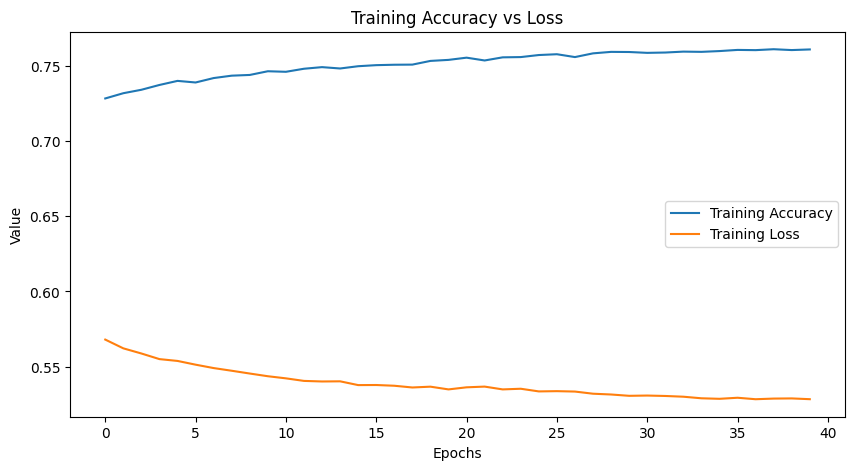

In [ ]:
# 6. Plot Accuracy vs Loss
import matplotlib.pyplot as plt

acc = history.history['accuracy'] + history_fine.history['accuracy']
loss = history.history['loss'] + history_fine.history['loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Accuracy vs Loss')
plt.legend()
plt.show()

In [ ]:
# Save model
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved_models/drought_model_mobilenetv22.h5')
print("Model Saved Successfully!")
# /content/drive/MyDrive

In [ ]:
# To test trained model
# Load and preproces images
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your drought image
# img_path = '/content/data_drought/Drought 28x28x4/train/drought/image_0_barren_land.png'    #Non - Drought
img_path = '/content/data_drought/Drought 28x28x4/train/drought/image_10001_barren_land.png'   #Non - Drought


# Load the image
img = image.load_img(img_path, target_size=(64, 64))

# Convert image to array
img_array = image.img_to_array(img)

# Normalize (rescale)
img_array = img_array / 255.0

# Expand dims to match model input shape (batch_size, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
# To predict for val_generator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Step 1: Predict on validation data
val_steps = val_generator.samples // val_generator.batch_size + 1  # Total steps to cover all images
pred_probs = model.predict(val_generator, steps=val_steps, verbose=1)

# Step 2: Convert probabilities to class labels (threshold 0.5)
y_pred = (pred_probs > 0.5).astype(int).flatten()

# Step 3: True labels from generator
y_true = val_generator.classes

# Step 4: Print evaluation metrics
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

# Step 5: Detailed classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Step 6: Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction score: 0.2136794626712799
Predicted Class: Non-Drought


In [ ]:
# To predict for val_generator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Step 1: Predict on validation data
val_steps = val_generator.samples // val_generator.batch_size + 1  # Total steps to cover all images
pred_probs = model.predict(val_generator, steps=val_steps, verbose=1)

# Step 2: Convert probabilities to class labels (threshold 0.5)
y_pred = (pred_probs > 0.5).astype(int).flatten()

# Step 3: True labels from generator
y_true = val_generator.classes

# Step 4: Print evaluation metrics
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

# Step 5: Detailed classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Step 6: Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step
Accuracy: 0.4989580619953113
Precision: 0.524980978950038
Recall: 0.5118694362017804
F1 Score: 0.5183423062476524

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.48      0.48      3634
           1       0.52      0.51      0.52      4044

    accuracy                           0.50      7678
   macro avg       0.50      0.50      0.50      7678
weighted avg       0.50      0.50      0.50      7678


Confusion Matrix:
 [[1761 1873]
 [1974 2070]]


In [ ]:
!pip install wandb
# Command 4

In [ ]:
!export CUDA_VISIBLE_DEVICES=0
# Command 5

In [ ]:
!export PATH=~/.local/bin:$PATH
# Command 6

a8b8f04c4b9cf39ff8d0aee33339022f12e5e716

In [ ]:
!wandb init
# Command 7

Let's setup this directory for W&B!
wandb: WARNING Using legacy-service, which is deprecated. If this is unintentional, you can fix it by ensuring you do not call `wandb.require('legacy-service')` and do not set the WANDB_X_REQUIRE_LEGACY_SERVICE environment variable.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kaurharshleen052 (kaurharshleen052-guru-nanak-dev-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: WARNING Using legacy-service, which is deprecated. If this is unintentional, you can fix it by ensuring you do not call `wandb.require('legacy-service')` and do not set

In [ ]:
!ls
# Command 8

data_drought		       drought_model_mobilenetv22.h5  wandb
drive			       drought_model_mobilenetv2.h5
drought_model_mobilenetv21.h5  sample_data


In [ ]:
!python train.py --epochs 1
# Command 9

python3: can't open file '/content/train.py': [Errno 2] No such file or directory


Replace VGG16 with mobilenet for better accuracy  17 May 2025

In [ ]:
# Unfreeze more layers:
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

In [ ]:
# Learning Rate Scheduling:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9)

In [ ]:
# Add Dropout:
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid', dtype='float32')
])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
# 1. Import mobilenetV2 and define model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

IMG_SHAPE = (64, 64, 3)

# Load MobileNetV2 as base model
base_model = MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<ipython-input-34-2667a0d29420>:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')


In [ ]:
# Unfreeze more layers:
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

In [ ]:
# Learning Rate Scheduling:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9)

In [ ]:
# Add Dropout:
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid', dtype='float32')
])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
# To Create train and val directory inside Drought 28*28*4
import os
import shutil

base_path = '/content/data_drought/Drought 28x28x4'

# Create new train & val folders
os.makedirs(f'{base_path}/train/drought', exist_ok=True)
os.makedirs(f'{base_path}/train/non_drought', exist_ok=True)
os.makedirs(f'{base_path}/val/drought', exist_ok=True)
os.makedirs(f'{base_path}/val/non_drought', exist_ok=True)

# Move drought images to train/drought
for file in os.listdir(f'{base_path}/drought'):
    src = os.path.join(f'{base_path}/drought', file)
    dst = os.path.join(f'{base_path}/train/drought', file)
    shutil.move(src, dst)

# Move non_drought images to train/non_drought
for file in os.listdir(f'{base_path}/non_drought'):
    src = os.path.join(f'{base_path}/non_drought', file)
    dst = os.path.join(f'{base_path}/train/non_drought', file)
    shutil.move(src, dst)

print("Images moved to train folder successfully.")

Images moved to train folder successfully.


In [ ]:
# To move 10% images form train to val folder
import os
import shutil
import random

def create_val_split(source_dir, val_dir, split_ratio=0.1):
    os.makedirs(val_dir, exist_ok=True)
    images = os.listdir(source_dir)
    val_count = int(len(images) * split_ratio)
    val_images = random.sample(images, val_count)

    for img in val_images:
        src = os.path.join(source_dir, img)
        dst = os.path.join(val_dir, img)
        shutil.move(src, dst)

# Paths
base_path = '/content/data_drought/Drought 28x28x4'
create_val_split(f'{base_path}/train/drought', f'{base_path}/val/drought')
create_val_split(f'{base_path}/train/non_drought', f'{base_path}/val/non_drought')

print("Validation split created successfully!")

Validation split created successfully!


In [ ]:
# Step 1: Import & Mixed Precision (Faster)
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import mixed_precision

# Enable mixed precision for speedup
mixed_precision.set_global_policy('mixed_float16')

In [ ]:
# Step 2: Data Generators with Augmentation

train_dir = '/content/data_drought/Drought 28x28x4/train'
val_dir = '/content/data_drought/Drought 28x28x4/val'

IMG_SIZE = (64, 64)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   zoom_range=0.2)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=IMG_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=IMG_SIZE,
                                                batch_size=BATCH_SIZE,
                                                class_mode='binary')

Found 55984 images belonging to 2 classes.
Found 20807 images belonging to 2 classes.


In [ ]:
#  Step 3: Load MobileNetV2 Base Model
# base_model = tf.keras.applications.MobileNetV2(input_shape=(96, 96, 3),
#                                                include_top=False,
#                                                weights='imagenet')

# base_model.trainable = False  # Freeze pre-trained layers

#  Step 3: Load MobileNetV2 Base Model with alpha=0.35
base_model = tf.keras.applications.MobileNetV2(input_shape=(96, 96, 3),
                                               alpha=0.35,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
# # Step 3: Load EfficientNetB0   ---  just to check accuracy
# # base_model.trainable = False  # Freeze pre-trained layers
# base_model = tf.keras.applications.EfficientNetB0(input_shape=(96, 96, 3),
#                                                alpha=0.35,
#                                                include_top=False,
#                                                weights='imagenet')

In [ ]:
# Step 4: Build the Full Model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid', dtype='float32')  # force float32 output
])

In [ ]:
# Step 5: Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# # Step 6: Train the Model with Class Weights
# class_weights = {0: 0.95, 1: 1.05}

# history = model.fit(train_generator,
#                     validation_data=val_generator,
#                     epochs=10,
#                     class_weight=class_weights)

Epoch 1/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 261s 109ms/step - accuracy: 0.7119 - loss: 0.5897 - val_accuracy: 0.7411 - val_loss: 0.5651
Epoch 2/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 228s 106ms/step - accuracy: 0.7380 - loss: 0.5581 - val_accuracy: 0.7462 - val_loss: 0.5488
Epoch 3/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 261s 105ms/step - accuracy: 0.7430 - loss: 0.5484 - val_accuracy: 0.7477 - val_loss: 0.5472
Epoch 4/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 225s 104ms/step - accuracy: 0.7455 - loss: 0.5458 - val_accuracy: 0.7576 - val_loss: 0.5343
Epoch 5/20
1140/2160 ━━━━━━━━━━━━━━━━━━━━ 1:42 100ms/step - accuracy: 0.7474 - loss: 0.5440

In [ ]:
# Step 6: Train the Model with Class Weights  // FOR 20 EPOCHS   - its taking almost 48min per epoch and that's not good
class_weights = {0: 0.95, 1: 1.05}

history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    class_weight=class_weights)

Epoch 1/20


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [ ]:
# 3. Finetune mobilenet for better accuracy
# Unfreeze some top layers
base_model.trainable = True

# fine-tune last few layers only
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Re-compile with lower learning rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fine-tune model
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # Can increase if accuracy improves
)

Epoch 1/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 258s 108ms/step - accuracy: 0.6666 - loss: 0.6416 - val_accuracy: 0.6868 - val_loss: 0.6143
Epoch 2/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 213s 99ms/step - accuracy: 0.7024 - loss: 0.5984 - val_accuracy: 0.6899 - val_loss: 0.6015
Epoch 3/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 215s 99ms/step - accuracy: 0.7131 - loss: 0.5859 - val_accuracy: 0.7095 - val_loss: 0.5846
Epoch 4/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 213s 99ms/step - accuracy: 0.7188 - loss: 0.5800 - val_accuracy: 0.7129 - val_loss: 0.5830
Epoch 5/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 212s 98ms/step - accuracy: 0.7252 - loss: 0.5746 - val_accuracy: 0.7160 - val_loss: 0.5805
Epoch 6/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 215s 100ms/step - accuracy: 0.7284 - loss: 0.5693 - val_accuracy: 0.7245 - val_loss: 0.5735
Epoch 7/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 259s 98ms/step - accuracy: 0.7307 - loss: 0.5636 - val_accuracy: 0.7262 - val_loss: 0.5669
Epoch 8/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 265s 100ms/step - accurac

In [ ]:
# Step 7: Plot Accuracy & Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [ ]:
# 5. Save the model
model.save('/content/drought_model_mobilenetv16 may 2025.h5')

Checking the code after this

In [ ]:
#  Step 3: Load MobileNetV2 Base Model with alpha=0.35
base_model = tf.keras.applications.MobileNetV2(input_shape=(96, 96, 3),
                                               alpha=0.35,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(96, 96),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42
)

Found 55984 images belonging to 2 classes.


In [ ]:
steps_per_epoch=100

In [ ]:
# Step 4: Build the Full Model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid', dtype='float32')  # force float32 output
])

In [ ]:
# Step 5: Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 6: Train the Model with Class Weights  // FOR 20 EPOCHS   - its taking almost 8min per epoch and that's not good
class_weights = {0: 0.95, 1: 1.05}

history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    class_weight=class_weights)

Epoch 1/20
   4/1750 ━━━━━━━━━━━━━━━━━━━━ 2:25:24 5s/step - accuracy: 0.5150 - loss: 0.7486

KeyboardInterrupt: 

Using a lighter model 20 May 2025

In [ ]:
# Step 3: Load EfficientNetB0   ---  just to check accuracy
# base_model.trainable = False  # Freeze pre-trained layers
base_model = tf.keras.applications.EfficientNetB0(input_shape=(96, 96, 3),
                                               alpha=0.35,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
# Data Generaotors with Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/data_drought/Drought 28x28x4/train"
val_dir = "/content/data_drought/Drought 28x28x4/val"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 62203 images belonging to 2 classes.
Found 14588 images belonging to 2 classes.


In [ ]:
# Load MobileNetV2 Base Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(64, 64, 3),
                         include_top=False,
                         weights='imagenet',
                         alpha=0.35)  # lightweight model

base_model.trainable = False  # Freeze base for initial training

<ipython-input-41-87e7b2351b72>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(64, 64, 3),


2019640/2019640 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [ ]:
# Add Dropout:
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid', dtype='float32')
])

In [ ]:
class_weights = {0: 0.95, 1: 1.05}

In [ ]:
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_0.35_224            │ (None, 2, 2, 1280)     │       410,208 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,489 (1.57 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 410,208 (1.56 MB)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # You can increase once performance improves
)

Epoch 1/10
1944/1944 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.6508 - loss: 0.6468

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1944/1944 ━━━━━━━━━━━━━━━━━━━━ 751s 381ms/step - accuracy: 0.6508 - loss: 0.6468 - val_accuracy: 0.6714 - val_loss: 0.6245
Epoch 2/10
1944/1944 ━━━━━━━━━━━━━━━━━━━━ 710s 365ms/step - accuracy: 0.6764 - loss: 0.6145 - val_accuracy: 0.6680 - val_loss: 0.6262
Epoch 3/10
1944/1944 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.6788 - loss: 0.6156

KeyboardInterrupt: 

In [ ]:
# Plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

Build ResNet50 Model 21 May 2025
Finished this task on 26 May 2025

In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

In [ ]:
# 1. Import Libraries
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt

# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os

In [ ]:
# # 2. Image Generators with Augmentation
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     zoom_range=0.2,
#     horizontal_flip=True
# )
# val_datagen = ImageDataGenerator(rescale=1./255)

# 2. Mixed Precision for Faster Training (if GPU supports it)
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

In [ ]:
# # 3. Define Paths and Flow from Directory
# train_dir = '/content/data_drought/Drought 28x28x4/train'
# val_dir = '/content/data_drought/Drought 28x28x4/val'

# IMG_SIZE = (64, 64)
# BATCH_SIZE = 32

# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode='binary'
# )

# val_generator = val_datagen.flow_from_directory(
#     val_dir,
#     target_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode='binary'
# )

# 3. Image Generators with Lighter Augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=0.1
)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# # 4. Define Class Weights (adjust based on your counts)
# class_weights = {
#     0: 0.95,  # class 'drought'
#     1: 1.05   # class 'non_drought'
# }

# 4. Directory Paths
train_dir = '/content/data_drought/Drought 28x28x4/train'
val_dir = '/content/data_drought/Drought 28x28x4/val'

IMG_SIZE = (32, 32)
BATCH_SIZE = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 69112 images belonging to 2 classes.
Found 7679 images belonging to 2 classes.


In [ ]:
# # 5. Build ResNet50 Model
# base_model = ResNet50(include_top=False, input_shape=(64, 64, 3), weights='imagenet')
# base_model.trainable = False  # Freeze base initially

# model = Sequential([
#     base_model,
#     GlobalAveragePooling2D(),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')  # Binary classification
# ])

# model.compile(
#     optimizer=Adam(learning_rate=0.0001),
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

# model.summary()

# 5. Class Weights (update if needed)
class_weights = {0: 0.95, 1: 1.05}

In [ ]:
# # 6. Train Model (Initial)
# initial_epochs = 10
# history = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=initial_epochs,
#     class_weight=class_weights
# )

# 6. ResNet50 Model (Freeze more layers)
base_model = ResNet50(include_top=False, input_shape=(32, 32, 3), weights='imagenet')
for layer in base_model.layers[:140]:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid', dtype='float32')  # Output in float32 for compatibility
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 15,240,449 (58.14 MB)

 Non-trainable params: 8,609,664 (32.84 MB)

In [ ]:
# # 7. Fine-tune from deeper layers
# base_model.trainable = True

# fine_tune_at = 100  # freeze first 100 layers
# for layer in base_model.layers[:fine_tune_at]:
#     layer.trainable = False

# model.compile(
#     optimizer=Adam(learning_rate=0.00001),  # Lower LR
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

# fine_tune_epochs = 10
# total_epochs = initial_epochs + fine_tune_epochs

# history_fine = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=total_epochs,
#     initial_epoch=history.epoch[-1],
#     class_weight=class_weights
# )

# 7. Callbacks to stop early and save best model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    ModelCheckpoint('resnet_best_model.h5', monitor='val_accuracy', save_best_only=True)
]

In [ ]:
# # 8. Plot Accuracy and Loss
# acc = history.history['accuracy'] + history_fine.history['accuracy']
# val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
# loss = history.history['loss'] + history_fine.history['loss']
# val_loss = history.history['val_loss'] + history_fine.history['val_loss']

# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# plt.plot(acc, label='Train Accuracy')
# plt.plot(val_acc, label='Val Accuracy')
# plt.title('Accuracy')
# plt.legend()

# plt.subplot(1,2,2)
# plt.plot(loss, label='Train Loss')
# plt.plot(val_loss, label='Val Loss')
# plt.title('Loss')
# plt.legend()
# plt.show()

# 8. Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights,
    callbacks=callbacks
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6381 - loss: 0.6761

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 145s 54ms/step - accuracy: 0.6381 - loss: 0.6760 - val_accuracy: 0.5240 - val_loss: 0.8263
Epoch 2/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 87s 40ms/step - accuracy: 0.6960 - loss: 0.6000 - val_accuracy: 0.4757 - val_loss: 0.8707
Epoch 3/20
2159/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7066 - loss: 0.5887

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7066 - loss: 0.5887 - val_accuracy: 0.5910 - val_loss: 0.6942
Epoch 4/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 139s 37ms/step - accuracy: 0.7086 - loss: 0.5880 - val_accuracy: 0.5268 - val_loss: 5.8893
Epoch 5/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7148 - loss: 0.5794 - val_accuracy: 0.4744 - val_loss: 0.7543
Epoch 6/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.7148 - loss: 0.5793 - val_accuracy: 0.5606 - val_loss: 0.6964
Epoch 7/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7193 - loss: 0.5744

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7193 - loss: 0.5744 - val_accuracy: 0.6645 - val_loss: 0.6545
Epoch 8/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 89s 41ms/step - accuracy: 0.7204 - loss: 0.5728 - val_accuracy: 0.6553 - val_loss: 0.6836
Epoch 9/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 93s 43ms/step - accuracy: 0.7185 - loss: 0.5727 - val_accuracy: 0.4732 - val_loss: 0.9567
Epoch 10/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7231 - loss: 0.5708 - val_accuracy: 0.6402 - val_loss: 0.6626
Epoch 11/20
2159/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7220 - loss: 0.5672

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.7220 - loss: 0.5672 - val_accuracy: 0.6791 - val_loss: 0.7592


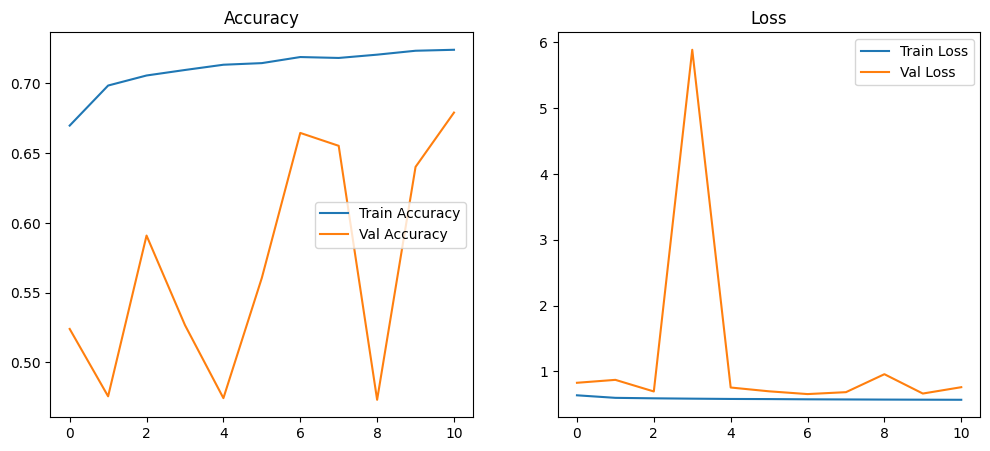

In [ ]:
# 9. Plot Accuracy and Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
# 5. Fine-Tune Top Layers
base_model.trainable = True  # Unfreeze for fine-tuning

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

fine_tune_epochs = 20

history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=fine_tune_epochs
)   # if graph is not looking good, then we can do fine tuning

Epoch 1/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 127s 48ms/step - accuracy: 0.7191 - loss: 0.5751 - val_accuracy: 0.6990 - val_loss: 0.6070
Epoch 2/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 86s 40ms/step - accuracy: 0.7267 - loss: 0.5666 - val_accuracy: 0.7143 - val_loss: 0.6174
Epoch 3/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.7253 - loss: 0.5652 - val_accuracy: 0.7058 - val_loss: 0.6025
Epoch 4/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.7248 - loss: 0.5663 - val_accuracy: 0.6391 - val_loss: 0.6724
Epoch 5/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 87s 40ms/step - accuracy: 0.7304 - loss: 0.5615 - val_accuracy: 0.6225 - val_loss: 0.6482
Epoch 6/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 133s 36ms/step - accuracy: 0.7295 - loss: 0.5606 - val_accuracy: 0.6266 - val_loss: 0.6822
Epoch 7/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 78s 36ms/step - accuracy: 0.7310 - loss: 0.5582 - val_accuracy: 0.6714 - val_loss: 0.6211
Epoch 8/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.7310

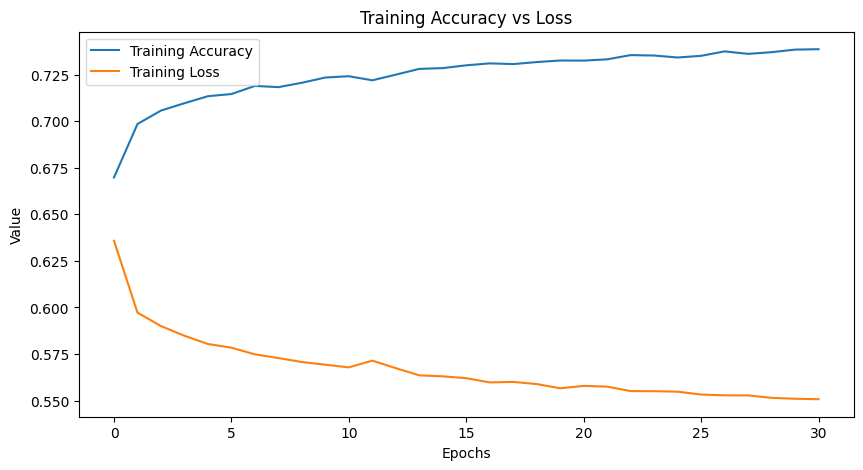

In [ ]:
# 6. Plot Accuracy vs Loss
import matplotlib.pyplot as plt

acc = history.history['accuracy'] + history_fine.history['accuracy']
loss = history.history['loss'] + history_fine.history['loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Accuracy vs Loss')
plt.legend()
plt.show()

In [ ]:
# Save model
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved_models/drought_model_resnet50.h5')
print("Model Saved Successfully!")

Model Saved Successfully!


In [ ]:
loss, accuracy = model.evaluate(val_generator)  # or test_generator if you have test data
print(f"Validation Accuracy: {accuracy:.4f}")

240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7126 - loss: 0.5850
Validation Accuracy: 0.7139


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image with correct size
img_path = '/content/data_drought/Drought 28x28x4/train/drought/image_10001_barren_land.png'
img = image.load_img(img_path, target_size=(32, 32))  # match your model input size!
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Predict
prediction = model.predict(img_array)
print(f"Prediction score (0-1): {prediction[0][0]}")

if prediction[0][0] > 0.5:
    print("Predicted Class: Drought")
else:
    print("Predicted Class: Non-Drought")


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Prediction score (0-1): 0.2058308869600296
Predicted Class: Non-Drought


In [ ]:
print(f"Confidence: {prediction[0][0]*100:.2f}%")

Confidence: 20.58%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Get true labels and predicted labels
true_labels = []
predicted_labels = []

for i, (images, labels) in enumerate(test_batches_ds):   # or use val_batches_ds if you prefer validation
    preds = model.predict(images)
    preds_binary = (preds > 0.5).astype(int).flatten()   # convert probabilities to 0/1

    true_labels.extend(labels.numpy())
    predicted_labels.extend(preds_binary)

# Step 2: Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Step 3: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Drought', 'Drought'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

NameError: name 'test_batches_ds' is not defined

26 May 2025

In [ ]:
# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os

In [ ]:
# 2. Mixed Precision for Faster Training (if GPU supports it)
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

In [ ]:
# 3. Image Generators with Lighter Augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=0.1
)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# 4. Directory Paths
train_dir = '/content/data_drought/Drought 28x28x4/train'
val_dir = '/content/data_drought/Drought 28x28x4/val'

IMG_SIZE = (32, 32)
BATCH_SIZE = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 69112 images belonging to 2 classes.
Found 7679 images belonging to 2 classes.


In [ ]:
# 5. Class Weights (update if needed)
class_weights = {0: 0.95, 1: 1.05}

In [ ]:
# 6. ResNet50 Model (Freeze more layers)
base_model = ResNet50(include_top=False, input_shape=(32, 32, 3), weights='imagenet')
for layer in base_model.layers[:140]:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid', dtype='float32')  # Output in float32 for compatibility
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 15,240,449 (58.14 MB)

 Non-trainable params: 8,609,664 (32.84 MB)

In [ ]:
# 7. Callbacks to stop early and save best model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    ModelCheckpoint('resnet_best_model.h5', monitor='val_accuracy', save_best_only=True)
]

In [ ]:
# 8. Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights,
    callbacks=callbacks
)

Epoch 1/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 77s 36ms/step - accuracy: 0.7028 - loss: 0.5952 - val_accuracy: 0.5268 - val_loss: 1.3686
Epoch 2/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 79s 37ms/step - accuracy: 0.7068 - loss: 0.5871 - val_accuracy: 0.5218 - val_loss: 0.6872
Epoch 3/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7139 - loss: 0.5780

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7139 - loss: 0.5780 - val_accuracy: 0.6785 - val_loss: 0.7049
Epoch 4/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.7180 - loss: 0.5750 - val_accuracy: 0.5079 - val_loss: 0.7105
Epoch 5/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 78s 36ms/step - accuracy: 0.7204 - loss: 0.5724 - val_accuracy: 0.5012 - val_loss: 0.6972
Epoch 6/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 78s 36ms/step - accuracy: 0.7252 - loss: 0.5661 - val_accuracy: 0.4784 - val_loss: 0.7739


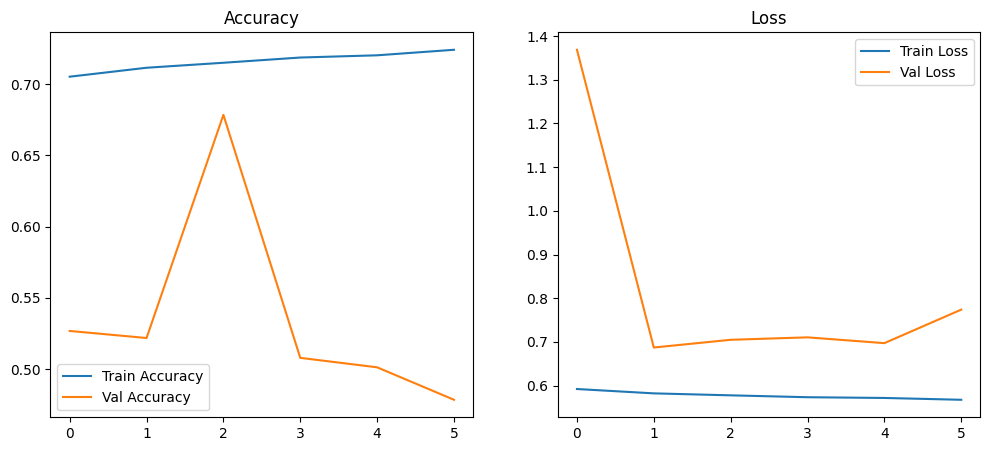

In [ ]:
# 9. Plot Accuracy and Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
# 5. Fine-Tune Top Layers
base_model.trainable = True  # Unfreeze for fine-tuning

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

fine_tune_epochs = 20

history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=fine_tune_epochs
)   # if graph is not looking good, then we can do fine tuning

Epoch 1/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 110s 42ms/step - accuracy: 0.7166 - loss: 0.5809 - val_accuracy: 0.6494 - val_loss: 0.6678
Epoch 2/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 77s 36ms/step - accuracy: 0.7214 - loss: 0.5710 - val_accuracy: 0.6773 - val_loss: 0.6090
Epoch 3/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.7243 - loss: 0.5692 - val_accuracy: 0.6579 - val_loss: 0.6429
Epoch 4/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.7239 - loss: 0.5699 - val_accuracy: 0.7023 - val_loss: 0.6074
Epoch 5/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 78s 36ms/step - accuracy: 0.7262 - loss: 0.5667 - val_accuracy: 0.7205 - val_loss: 0.5909
Epoch 6/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.7269 - loss: 0.5661 - val_accuracy: 0.6631 - val_loss: 0.6529
Epoch 7/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7308 - loss: 0.5603 - val_accuracy: 0.6760 - val_loss: 0.6150
Epoch 8/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.7315 

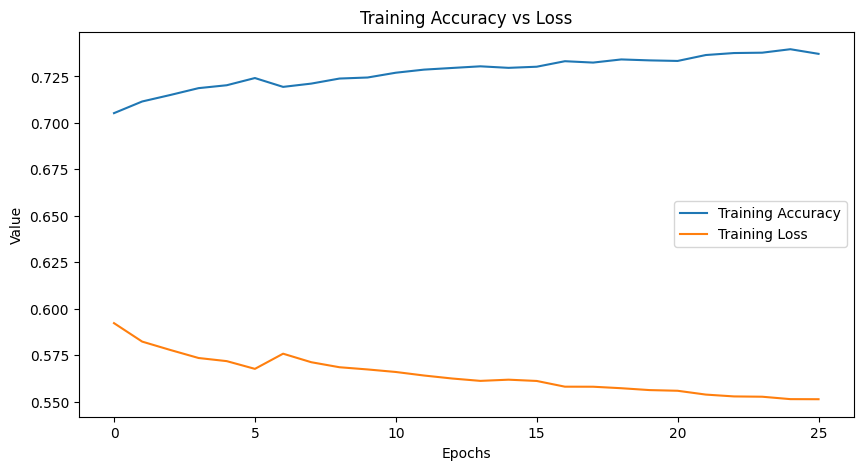

In [ ]:
# 6. Plot Accuracy vs Loss
import matplotlib.pyplot as plt

acc = history.history['accuracy'] + history_fine.history['accuracy']
loss = history.history['loss'] + history_fine.history['loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Accuracy vs Loss')
plt.legend()
plt.show()

In [ ]:
# Save model
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved_models/drought_model_resnet50(2nd Time).h5')
print("Model Saved Successfully!")

Model Saved Successfully!


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image with correct size
img_path = '/content/data_drought/Drought 28x28x4/train/drought/image_10001_barren_land.png'
img = image.load_img(img_path, target_size=(32, 32))  # match your model input size!
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Predict
prediction = model.predict(img_array)
print(f"Prediction score (0-1): {prediction[0][0]}")

if prediction[0][0] > 0.5:
    print("Predicted Class: Drought")
else:
    print("Predicted Class: Non-Drought")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Prediction score (0-1): 0.6936492323875427
Predicted Class: Drought


In [ ]:
loss, accuracy = model.evaluate(val_generator)  # or test_generator if you have test data
print(f"Validation Accuracy: {accuracy:.4f}")

240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6367 - loss: 0.6338
Validation Accuracy: 0.6342


In [ ]:
print(f"Confidence: {prediction[0][0]*100:.2f}%")

Confidence: 69.36%


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 32

val_datagen = ImageDataGenerator(rescale=1./255)

val_batches_ds = val_datagen.flow_from_directory(
    '/content/data_drought/Drought 28x28x4/val',
    target_size=(32, 32),  # match your model input size
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # important for confusion matrix alignment
)

Found 7679 images belonging to 2 classes.


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions
preds = model.predict(val_batches_ds)
predicted_classes = (preds > 0.5).astype(int).flatten()

# Get true labels
true_classes = val_batches_ds.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", cm)

# Optional: detailed report
print("\nClassification Report:\n", classification_report(true_classes, predicted_classes))

240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step
Confusion Matrix:
 [[1374 2260]
 [ 549 3496]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.38      0.49      3634
           1       0.61      0.86      0.71      4045

    accuracy                           0.63      7679
   macro avg       0.66      0.62      0.60      7679
weighted avg       0.66      0.63      0.61      7679



 26 May 2025 EfficientNetB0

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define image shape (match your preprocessing!)
IMG_SHAPE = (64, 64, 3)

In [ ]:
# Load EfficientNetB0 base
base_model = EfficientNetB0(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Build model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 2, 2, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = '/content/data_drought/Drought 28x28x4/train'
val_dir = '/content/data_drought/Drought 28x28x4/val'

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create batches
train_batches_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

val_batches_ds = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 69112 images belonging to 2 classes.
Found 7679 images belonging to 2 classes.


In [ ]:
# Train
history = model.fit(
    train_batches_ds,
    validation_data=val_batches_ds,
    epochs=20
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2160/2160 ━━━━━━━━━━━━━━━━━━━━ 85s 29ms/step - accuracy: 0.5054 - loss: 0.7002 - val_accuracy: 0.5268 - val_loss: 0.6919
Epoch 2/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.5100 - loss: 0.6969 - val_accuracy: 0.5268 - val_loss: 0.6919
Epoch 3/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.5098 - loss: 0.6964 - val_accuracy: 0.5268 - val_loss: 0.6911
Epoch 4/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.5153 - loss: 0.6953 - val_accuracy: 0.5268 - val_loss: 0.6911
Epoch 5/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.5117 - loss: 0.6955 - val_accuracy: 0.5268 - val_loss: 0.6919
Epoch 6/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.5143 - loss: 0.6946 - val_accuracy: 0.5268 - val_loss: 0.6913
Epoch 7/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - accuracy: 0.5166 - loss: 0.6941 - val_accuracy: 0.5268 - val_loss: 0.6914
Epoch 8/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.5174 - loss: 0.69

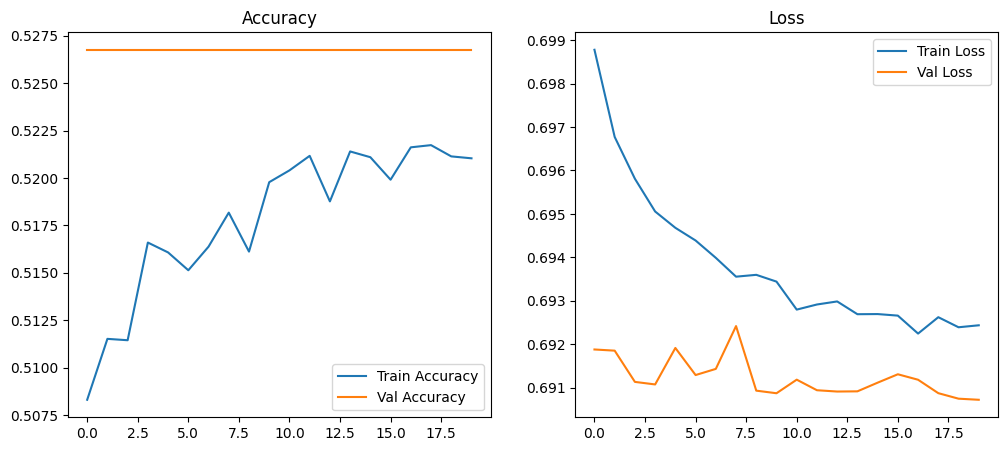

In [ ]:
# Plot results
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
# Fine-tune (optional)
base_model.trainable = True
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

fine_tune_epochs = 10
total_epochs = 20 + fine_tune_epochs

history_fine = model.fit(
    train_batches_ds,
    validation_data=val_batches_ds,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1]
)

Epoch 20/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 184s 50ms/step - accuracy: 0.7576 - loss: 0.5273 - val_accuracy: 0.7472 - val_loss: 0.5523
Epoch 21/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 64s 30ms/step - accuracy: 0.7568 - loss: 0.5266 - val_accuracy: 0.7379 - val_loss: 0.5599
Epoch 22/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 64s 30ms/step - accuracy: 0.7586 - loss: 0.5245 - val_accuracy: 0.7336 - val_loss: 0.5672
Epoch 23/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.7612 - loss: 0.5180 - val_accuracy: 0.7268 - val_loss: 0.5790
Epoch 24/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 64s 29ms/step - accuracy: 0.7614 - loss: 0.5180 - val_accuracy: 0.6778 - val_loss: 0.6047
Epoch 25/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.7656 - loss: 0.5100 - val_accuracy: 0.7369 - val_loss: 0.5641
Epoch 26/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 67s 31ms/step - accuracy: 0.7671 - loss: 0.5092 - val_accuracy: 0.7238 - val_loss: 0.5786
Epoch 27/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 67s 31ms/step - accuracy:

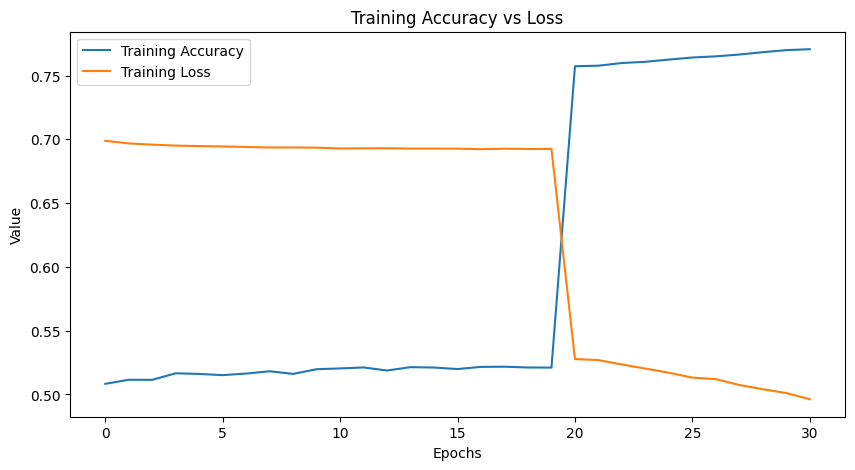

In [ ]:
# 6. Plot Accuracy vs Loss
import matplotlib.pyplot as plt

acc = history.history['accuracy'] + history_fine.history['accuracy']
loss = history.history['loss'] + history_fine.history['loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Accuracy vs Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image with correct size
img_path = '/content/data_drought/Drought 28x28x4/train/drought/image_10001_barren_land.png'
img = image.load_img(img_path, target_size=(32, 32))  # match your model input size!
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Predict
prediction = model.predict(img_array)
print(f"Prediction score (0-1): {prediction[0][0]}")

if prediction[0][0] > 0.5:
    print("Predicted Class: Drought")
else:
    print("Predicted Class: Non-Drought")

In [ ]:
print(f"Confidence: {prediction[0][0]*100:.2f}%")

In [ ]:
loss, accuracy = model.evaluate(val_generator)  # or test_generator if you have test data
print(f"Validation Accuracy: {accuracy:.4f}")

In [ ]:
# Save model
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved_models/drought_model_efficientNetB0.h5')
print("Model Saved Successfully!")
# /content/drive/MyDrive

27 May 2025 DenseNet121

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Paths
train_dir = '/content/data_drought/Drought 28x28x4/train'
val_dir = '/content/data_drought/Drought 28x28x4/val'

# Image size and batch
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

In [ ]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   zoom_range=0.2)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=IMG_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=IMG_SIZE,
                                                batch_size=BATCH_SIZE,
                                                class_mode='binary')

Found 69112 images belonging to 2 classes.
Found 7679 images belonging to 2 classes.


In [ ]:
# Load DenseNet121 base
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False  # freeze base

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Build model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 2, 2, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,038,529 (26.85 MB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('densenet_best_model.h5', save_best_only=True)

In [ ]:
 # Train
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[early_stop, checkpoint])

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5627 - loss: 0.8375

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 216s 88ms/step - accuracy: 0.5628 - loss: 0.8375 - val_accuracy: 0.6641 - val_loss: 0.6228
Epoch 2/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6301 - loss: 0.6739

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 156s 72ms/step - accuracy: 0.6301 - loss: 0.6739 - val_accuracy: 0.6828 - val_loss: 0.6055
Epoch 3/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6514 - loss: 0.6403

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 154s 71ms/step - accuracy: 0.6514 - loss: 0.6403 - val_accuracy: 0.6914 - val_loss: 0.5994
Epoch 4/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6657 - loss: 0.6224

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 164s 76ms/step - accuracy: 0.6657 - loss: 0.6224 - val_accuracy: 0.6898 - val_loss: 0.5983
Epoch 5/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6746 - loss: 0.6187

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 156s 72ms/step - accuracy: 0.6746 - loss: 0.6187 - val_accuracy: 0.7045 - val_loss: 0.5961
Epoch 6/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6708 - loss: 0.6173

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 202s 72ms/step - accuracy: 0.6708 - loss: 0.6173 - val_accuracy: 0.7011 - val_loss: 0.5942
Epoch 7/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 161s 75ms/step - accuracy: 0.6719 - loss: 0.6150 - val_accuracy: 0.7001 - val_loss: 0.5943
Epoch 8/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6752 - loss: 0.6153

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 155s 72ms/step - accuracy: 0.6752 - loss: 0.6153 - val_accuracy: 0.7017 - val_loss: 0.5936
Epoch 9/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6750 - loss: 0.6137

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 155s 72ms/step - accuracy: 0.6750 - loss: 0.6137 - val_accuracy: 0.7050 - val_loss: 0.5930
Epoch 10/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 158s 73ms/step - accuracy: 0.6726 - loss: 0.6174 - val_accuracy: 0.7046 - val_loss: 0.5936
Epoch 11/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 154s 71ms/step - accuracy: 0.6747 - loss: 0.6130 - val_accuracy: 0.6994 - val_loss: 0.5937
Epoch 12/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 154s 71ms/step - accuracy: 0.6773 - loss: 0.6111 - val_accuracy: 0.6983 - val_loss: 0.5931
Epoch 13/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6744 - loss: 0.6135

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 155s 72ms/step - accuracy: 0.6744 - loss: 0.6135 - val_accuracy: 0.7048 - val_loss: 0.5925
Epoch 14/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 155s 72ms/step - accuracy: 0.6773 - loss: 0.6134 - val_accuracy: 0.7005 - val_loss: 0.5927
Epoch 15/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 159s 74ms/step - accuracy: 0.6739 - loss: 0.6149 - val_accuracy: 0.7013 - val_loss: 0.5929
Epoch 16/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 155s 72ms/step - accuracy: 0.6729 - loss: 0.6143 - val_accuracy: 0.7011 - val_loss: 0.5926
Epoch 17/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6750 - loss: 0.6129

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 155s 72ms/step - accuracy: 0.6750 - loss: 0.6129 - val_accuracy: 0.7026 - val_loss: 0.5917
Epoch 18/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 155s 72ms/step - accuracy: 0.6778 - loss: 0.6130 - val_accuracy: 0.7010 - val_loss: 0.5924
Epoch 19/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6750 - loss: 0.6113

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 157s 73ms/step - accuracy: 0.6750 - loss: 0.6113 - val_accuracy: 0.7045 - val_loss: 0.5917
Epoch 20/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6775 - loss: 0.6112

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 201s 72ms/step - accuracy: 0.6775 - loss: 0.6112 - val_accuracy: 0.7030 - val_loss: 0.5916


In [ ]:
# Plot results
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
# Save model
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved_models/drought_model_DenseNet121without_finetuning.h5')
print("Model Saved Successfully!")
# /content/drive/MyDrive

Model Saved Successfully!


In [ ]:
# Fine-Tune Top Layers
base_model.trainable = True  # Unfreeze for fine-tuning

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

fine_tune_epochs = 20

history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=fine_tune_epochs
)

Epoch 1/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 438s 132ms/step - accuracy: 0.6691 - loss: 0.6440 - val_accuracy: 0.7424 - val_loss: 0.5571
Epoch 2/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 189s 88ms/step - accuracy: 0.7217 - loss: 0.5944 - val_accuracy: 0.7531 - val_loss: 0.5490
Epoch 3/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 192s 89ms/step - accuracy: 0.7262 - loss: 0.5857 - val_accuracy: 0.7549 - val_loss: 0.5427
Epoch 4/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 195s 90ms/step - accuracy: 0.7368 - loss: 0.5708 - val_accuracy: 0.7584 - val_loss: 0.5382
Epoch 5/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 188s 87ms/step - accuracy: 0.7387 - loss: 0.5646 - val_accuracy: 0.7610 - val_loss: 0.5343
Epoch 6/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 188s 87ms/step - accuracy: 0.7482 - loss: 0.5567 - val_accuracy: 0.7608 - val_loss: 0.5356
Epoch 7/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 187s 87ms/step - accuracy: 0.7439 - loss: 0.5589 - val_accuracy: 0.7605 - val_loss: 0.5313
Epoch 8/20
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 189s 87ms/step - accuracy:

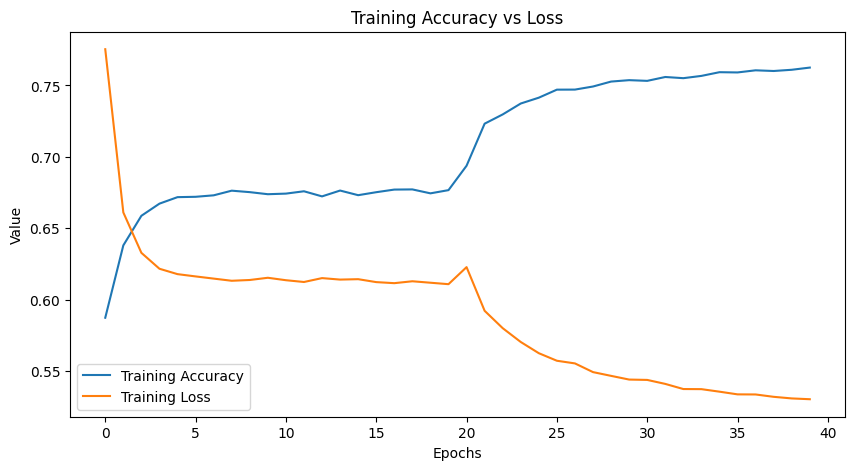

In [ ]:
# Plot Results after fine tuning
import matplotlib.pyplot as plt

acc = history.history['accuracy'] + history_fine.history['accuracy']
loss = history.history['loss'] + history_fine.history['loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Accuracy vs Loss')
plt.legend()
plt.show()

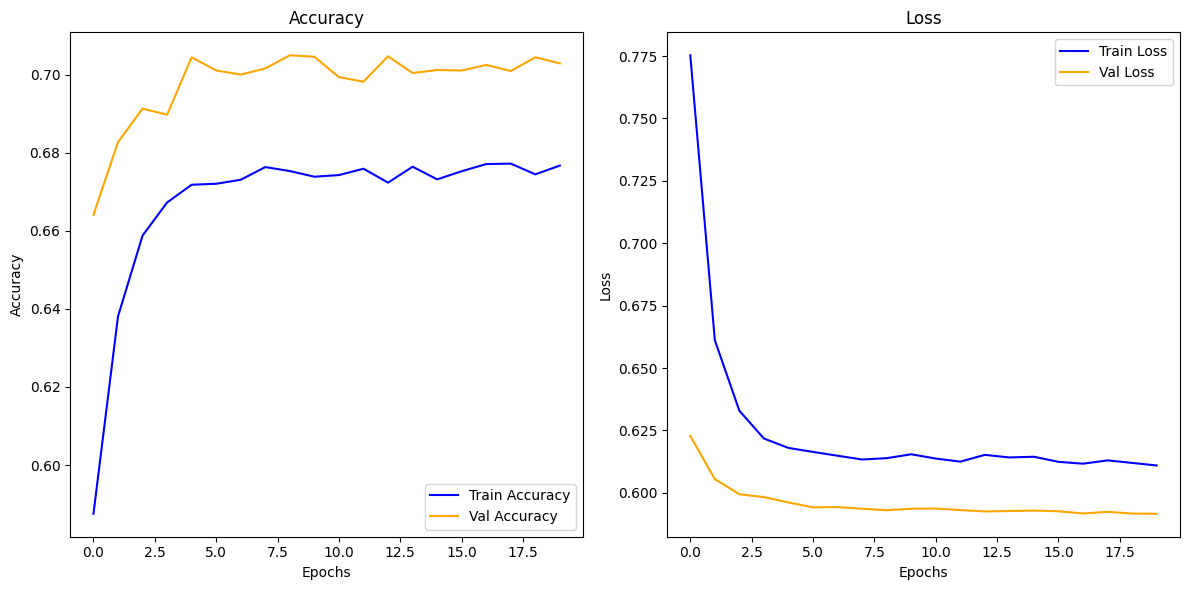

In [ ]:
import matplotlib.pyplot as plt

# Get metrics from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plotting
plt.figure(figsize=(12, 6))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy', color='blue')
plt.plot(epochs_range, val_acc, label='Val Accuracy', color='orange')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', color='blue')
plt.plot(epochs_range, val_loss, label='Val Loss', color='orange')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [ ]:
# Save model
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved_models/drought_model_DenseNet121after_finetuning.h5')
print("Model Saved Successfully!")
# /content/drive/MyDrive

Model Saved Successfully!


In [ ]:
# Fine-tune only top layers
fine_tune_at = 300  # Adjust as needed
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
for layer in base_model.layers[fine_tune_at:]:
    layer.trainable = True

# Compile with lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
fine_tune_epochs = 30
total_epochs = 20 + fine_tune_epochs

history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1]
)

Epoch 20/50
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 280s 101ms/step - accuracy: 0.7611 - loss: 0.5320 - val_accuracy: 0.7655 - val_loss: 0.5252
Epoch 21/50
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 169s 78ms/step - accuracy: 0.7655 - loss: 0.5261 - val_accuracy: 0.7652 - val_loss: 0.5255
Epoch 22/50
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 207s 80ms/step - accuracy: 0.7630 - loss: 0.5289 - val_accuracy: 0.7651 - val_loss: 0.5268
Epoch 23/50
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 179s 83ms/step - accuracy: 0.7636 - loss: 0.5262 - val_accuracy: 0.7652 - val_loss: 0.5254
Epoch 24/50
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 169s 78ms/step - accuracy: 0.7649 - loss: 0.5231 - val_accuracy: 0.7649 - val_loss: 0.5275
Epoch 25/50
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 176s 81ms/step - accuracy: 0.7647 - loss: 0.5246 - val_accuracy: 0.7656 - val_loss: 0.5270
Epoch 26/50
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 168s 78ms/step - accuracy: 0.7642 - loss: 0.5246 - val_accuracy: 0.7655 - val_loss: 0.5256
Epoch 27/50
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 170s 79ms/step - a

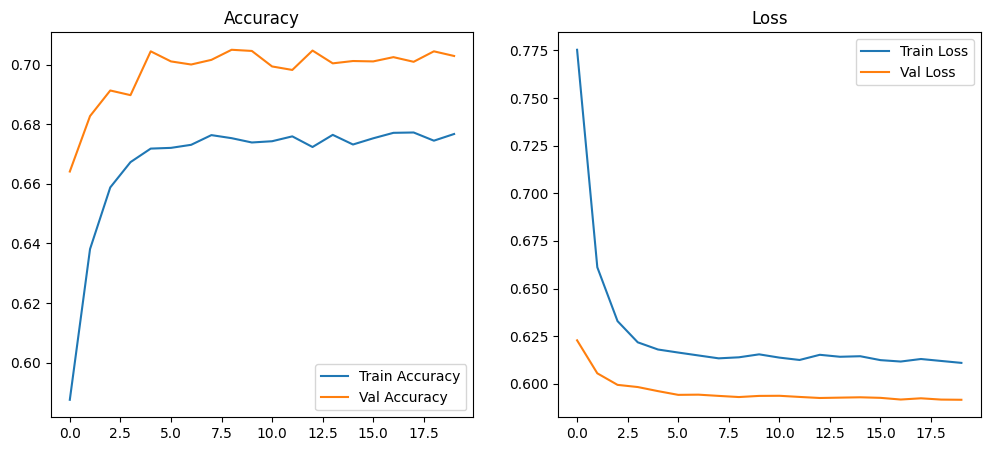

In [ ]:
# Plot results
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
# Save model
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved_models/drought_model_DenseNet121without_finetuningfor50epochs.h5')
print("Model Saved Successfully!")
# /content/drive/MyDrive

Model Saved Successfully!


5 June 2025 Inception V3

In [ ]:
# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# 2. Paths
train_dir = '/content/data_drought/Drought 28x28x4/train'
val_dir = '/content/data_drought/Drought 28x28x4/val'

In [ ]:
# 3. ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 69113 images belonging to 2 classes.
Found 7678 images belonging to 2 classes.


In [ ]:
# 4. InceptionV3 Base Model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # freeze initially

In [ ]:
# 5. Custom Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# 6. Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 7. Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('inceptionv3_best_model.h5', monitor='val_loss', save_best_only=True)

In [ ]:
# 8. Train Base Model
initial_epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=initial_epochs,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.5626 - loss: 0.8466

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 381s 169ms/step - accuracy: 0.5626 - loss: 0.8465 - val_accuracy: 0.6487 - val_loss: 0.6448
Epoch 2/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.6158 - loss: 0.7144

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 343s 159ms/step - accuracy: 0.6158 - loss: 0.7144 - val_accuracy: 0.6683 - val_loss: 0.6192
Epoch 3/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.6354 - loss: 0.6714

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 346s 160ms/step - accuracy: 0.6354 - loss: 0.6714 - val_accuracy: 0.6749 - val_loss: 0.6126
Epoch 4/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.6438 - loss: 0.6514

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 344s 159ms/step - accuracy: 0.6438 - loss: 0.6514 - val_accuracy: 0.6808 - val_loss: 0.6073
Epoch 5/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 341s 158ms/step - accuracy: 0.6526 - loss: 0.6379 - val_accuracy: 0.6767 - val_loss: 0.6081
Epoch 6/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.6563 - loss: 0.6320

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 343s 159ms/step - accuracy: 0.6563 - loss: 0.6320 - val_accuracy: 0.6822 - val_loss: 0.6058
Epoch 7/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.6555 - loss: 0.6313

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 347s 161ms/step - accuracy: 0.6555 - loss: 0.6313 - val_accuracy: 0.6864 - val_loss: 0.6017
Epoch 8/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.6631 - loss: 0.6246

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 347s 160ms/step - accuracy: 0.6631 - loss: 0.6246 - val_accuracy: 0.6874 - val_loss: 0.6005
Epoch 9/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 346s 160ms/step - accuracy: 0.6602 - loss: 0.6247 - val_accuracy: 0.6823 - val_loss: 0.6006
Epoch 10/10
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 350s 162ms/step - accuracy: 0.6657 - loss: 0.6247 - val_accuracy: 0.6719 - val_loss: 0.6096


In [ ]:
# 9. Fine-Tune
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

fine_tune_epochs = 20
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1] + 1,
    callbacks=[early_stop, checkpoint]
)

Epoch 11/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.6932 - loss: 0.6041

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 502s 199ms/step - accuracy: 0.6932 - loss: 0.6041 - val_accuracy: 0.7498 - val_loss: 0.5405
Epoch 12/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.7394 - loss: 0.5562

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 383s 177ms/step - accuracy: 0.7394 - loss: 0.5562 - val_accuracy: 0.7580 - val_loss: 0.5290
Epoch 13/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7454 - loss: 0.5505

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 394s 182ms/step - accuracy: 0.7454 - loss: 0.5505 - val_accuracy: 0.7636 - val_loss: 0.5265
Epoch 14/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.7470 - loss: 0.5474

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 396s 183ms/step - accuracy: 0.7470 - loss: 0.5474 - val_accuracy: 0.7654 - val_loss: 0.5216
Epoch 15/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 467s 195ms/step - accuracy: 0.7544 - loss: 0.5387 - val_accuracy: 0.7686 - val_loss: 0.5229
Epoch 16/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.7555 - loss: 0.5374

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 401s 186ms/step - accuracy: 0.7555 - loss: 0.5374 - val_accuracy: 0.7697 - val_loss: 0.5186
Epoch 17/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.7590 - loss: 0.5334

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 405s 188ms/step - accuracy: 0.7590 - loss: 0.5334 - val_accuracy: 0.7688 - val_loss: 0.5166
Epoch 18/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.7583 - loss: 0.5320

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 428s 181ms/step - accuracy: 0.7583 - loss: 0.5320 - val_accuracy: 0.7696 - val_loss: 0.5164
Epoch 19/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7601 - loss: 0.5310

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 393s 182ms/step - accuracy: 0.7601 - loss: 0.5310 - val_accuracy: 0.7706 - val_loss: 0.5146
Epoch 20/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.7598 - loss: 0.5322

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 387s 179ms/step - accuracy: 0.7598 - loss: 0.5322 - val_accuracy: 0.7722 - val_loss: 0.5116
Epoch 21/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 433s 175ms/step - accuracy: 0.7577 - loss: 0.5322 - val_accuracy: 0.7703 - val_loss: 0.5123
Epoch 22/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 381s 175ms/step - accuracy: 0.7626 - loss: 0.5281 - val_accuracy: 0.7713 - val_loss: 0.5123
Epoch 23/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.7627 - loss: 0.5269

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 379s 176ms/step - accuracy: 0.7627 - loss: 0.5269 - val_accuracy: 0.7709 - val_loss: 0.5114
Epoch 24/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.7619 - loss: 0.5269

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 380s 176ms/step - accuracy: 0.7619 - loss: 0.5269 - val_accuracy: 0.7695 - val_loss: 0.5109
Epoch 25/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.7643 - loss: 0.5268

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 381s 176ms/step - accuracy: 0.7643 - loss: 0.5268 - val_accuracy: 0.7718 - val_loss: 0.5107
Epoch 26/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 376s 174ms/step - accuracy: 0.7626 - loss: 0.5270 - val_accuracy: 0.7725 - val_loss: 0.5116
Epoch 27/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 379s 175ms/step - accuracy: 0.7626 - loss: 0.5238 - val_accuracy: 0.7726 - val_loss: 0.5122
Epoch 28/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 375s 174ms/step - accuracy: 0.7674 - loss: 0.5187 - val_accuracy: 0.7732 - val_loss: 0.5116
Epoch 29/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 383s 177ms/step - accuracy: 0.7631 - loss: 0.5245 - val_accuracy: 0.7736 - val_loss: 0.5128
Epoch 30/30
2160/2160 ━━━━━━━━━━━━━━━━━━━━ 381s 176ms/step - accuracy: 0.7668 - loss: 0.5210 - val_accuracy: 0.7712 - val_loss: 0.5134


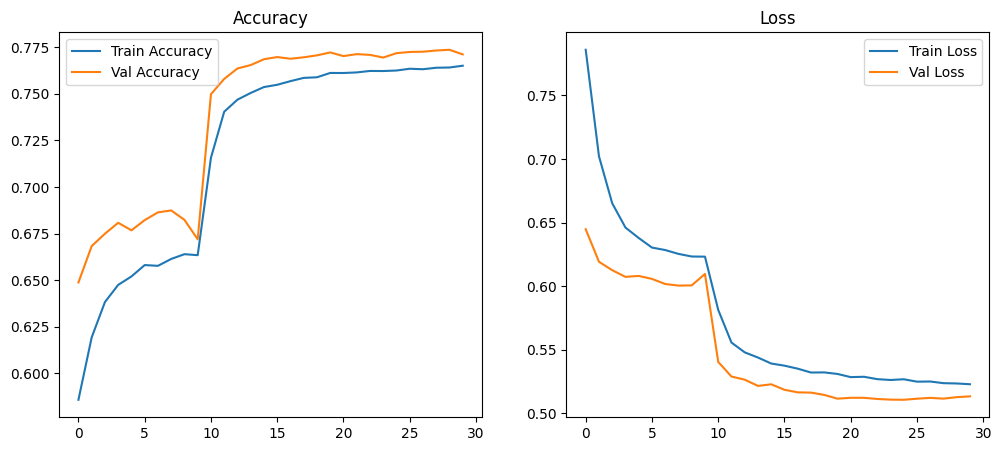

In [ ]:
# 10. Plotting
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
# 11. Evaluation
val_generator.reset()
preds = model.predict(val_generator)
predicted_classes = (preds > 0.5).astype(int).flatten()
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

print("\nConfusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

240/240 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step

Confusion Matrix:
[[2812  822]
 [ 930 3114]]

Classification Report:
              precision    recall  f1-score   support

     drought       0.75      0.77      0.76      3634
 non_drought       0.79      0.77      0.78      4044

    accuracy                           0.77      7678
   macro avg       0.77      0.77      0.77      7678
weighted avg       0.77      0.77      0.77      7678



In [ ]:
# 12. Save model
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved_models/drought_model_InceptionV3.h5')
print("Model Saved Successfully!")
# /content/drive/MyDrive

Model Saved Successfully!
